In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from glob import glob
from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.layers import Input ,Conv2D ,MaxPooling2D ,Flatten ,Dense ,Dropout ,Concatenate
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error ,classification_report
import matplotlib.pyplot as plt

In [2]:
image_dir = "D:\\My projects\\Brain\\train\\images"
image_paths = glob(os.path.join(image_dir,"*.jpg"))

In [3]:
image_paths

['D:\\My projects\\Brain\\train\\images\\no1022.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1024.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1025.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1031.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1034.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1037.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1038.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1042.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1057.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1061.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1071.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1075.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1077.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1102.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1109.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1131.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1132.jpg',
 'D:\\My projects\\Brain\\train\\images\\no1133.jpg',
 'D:\\My projects\\Brain\\tr

In [4]:
def preprocess_img(img_path):
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(256,256))
    img = img / 255.0
    return img

In [5]:
images = [preprocess_img(i) for i in image_paths]

In [6]:
images

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(256, 256)),
 array([[0.09803922, 0.10196078, 0.10980392, ..., 0.10588235, 0.10588235,
         0.10588235],
        [0.09803922, 0.10196078, 0.10980392, ..., 0.10588235, 0.10588235,
         0.10588235],
        [0.10196078, 0.10588235, 0.10980392, ..., 0.10588235, 0.10588235,
         0.10588235],
        ...,
        [0.12156863, 0.11764706, 0.11372549, ..., 0.09803922, 0.10588235,
         0.11372549],
        [0.11764706, 0.11764706, 0.11372549, ..., 0.08627451, 0.09803922,
         0.10588235],
        [0.11764706, 0.11764706, 0.11372549, ..., 0.08627451, 0.09803922,
         0.10588235]], shape=(256, 256)),
 array([[0.06666667, 0.04313725, 0.01568627, ..., 0.00784314, 0.00784314,
         0.00784314],
        [0.5372549 , 0.46666

In [7]:
image_input = Input(shape=(256,256,1))
x = Conv2D(16,(3,3),activation="relu")(image_input)
x = MaxPooling2D(2,2)(x)
x = Conv2D(32,(3,3),activation="relu")(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64,(3,3),activation="relu")(x)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
box_output = Dense(4,activation="linear")(x)
box_model = Model(inputs=image_input,outputs=box_output)

In [8]:
box_model.compile(optimizer="adam",loss="mse")

In [9]:
label_dir = "D:\\My projects\\Brain\\train\\labels"
image_count = 254
boxes = []

label_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]

for file_name in label_files:
    label_path = os.path.join(label_dir, file_name)
    with open(label_path, "r") as f:
        line = f.readline().strip().split()
        if len(line) == 5:
            _, x_center, y_center, w, h = map(float, line)
            x = int((x_center - w/2) * 256)
            y = int((y_center - h/2) * 256)
            w = int(w * 256)
            h = int(h * 256)
            boxes.append([x, y, w, h])
        else:
            print(f"Wrong format in the file: {file_name}")

In [10]:
len(boxes)

485

In [11]:
np.save("boxes.npy",np.array(boxes))

In [12]:
x_images = np.array(images).reshape(-1,256,256,1)
y_labels = np.load("boxes.npy")
box_model.fit(x_images,y_labels,epochs=20,batch_size=15,validation_split=0.2)
box_model.save("box_ddetector.h5")

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 3026.9900 - val_loss: 1487.5049
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 1217.4805 - val_loss: 1038.7140
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 977.0315 - val_loss: 1000.4199
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 935.1539 - val_loss: 1005.4274
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 888.4294 - val_loss: 969.8495
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 905.0374 - val_loss: 1041.0050
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 856.2952 - val_loss: 904.5183
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 831.8037 - val_loss: 897.3467
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 820.3739 - val_loss: 904.8613
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 794.5939 - val_loss: 916.0224
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 773.1814 - val_loss: 936.5114
E

In [13]:
model = Sequential([
    Input(shape=(256,256,1)),
    Conv2D(16,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(2,activation="softmax")
])

In [14]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,396,482 (28.22 MB)

 Trainable params: 7,396,482 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
gene_data = pd.read_csv("D:\\My projects\\Brain\\dataset\\gene_expression.csv")
pd.set_option('display.max_columns', None)

In [17]:
gene_data

,ID_REF,GSM97793,GSM97794,GSM97795,GSM97796,GSM97797,GSM97798,GSM97799,GSM97800,GSM97801,GSM97802,GSM97803,GSM97804,GSM97805,GSM97806,GSM97807,GSM97808,GSM97809,GSM97810,GSM97811,GSM97812,GSM97813,GSM97814,GSM97815,GSM97816,GSM97817,GSM97818,GSM97819,GSM97820,GSM97821,GSM97822,GSM97823,GSM97824,GSM97825,GSM97826,GSM97827,GSM97828,GSM97829,GSM97830,GSM97831,GSM97832,GSM97833,GSM97834,GSM97835,GSM97836,GSM97837,GSM97838,GSM97839,GSM97840,GSM97841,GSM97842,GSM97843,GSM97844,GSM97845,GSM97846,GSM97847,GSM97848,GSM97849,GSM97850,GSM97851,GSM97852,GSM97853,GSM97854,GSM97855,GSM97856,GSM97857,GSM97858,GSM97859,GSM97860,GSM97861,GSM97862,GSM97863,GSM97864,GSM97865,GSM97866,GSM97867,GSM97868,GSM97869,GSM97870,GSM97871,GSM97872,GSM97873,GSM97874,GSM97875,GSM97876,GSM97877,GSM97878,GSM97879,GSM97880,GSM97881,GSM97882,GSM97883,GSM97884,GSM97885,GSM97886,GSM97887,GSM97888,GSM97889,GSM97890,GSM97891,GSM97892,GSM97893,GSM97894,GSM97895,GSM97896,GSM97897,GSM97898,GSM97899,GSM97900,GSM97901,GSM97902,GSM97903,GSM97904,GSM97905,GSM97906,GSM97907,GSM97908,GSM97909,GSM97910,GSM97911,GSM97912,GSM97913,GSM97914,GSM97915,GSM97916,GSM97917,GSM97918,GSM97919,GSM97920,GSM97921,GSM97922,GSM97923,GSM97924,GSM97925,GSM97926,GSM97927,GSM97928,GSM97929,GSM97930,GSM97931,GSM97932,GSM97933,GSM97934,GSM97935,GSM97936,GSM97937,GSM97938,GSM97939,GSM97940,GSM97941,GSM97942,GSM97943,GSM97944,GSM97945,GSM97946,GSM97947,GSM97948,GSM97949,GSM97950,GSM97951,GSM97952,GSM97953,GSM97954,GSM97955,GSM97956,GSM97957,GSM97958,GSM97959,GSM97960,GSM97961,GSM97962,GSM97963,GSM97964,GSM97965,GSM97966,GSM97967,GSM97968,GSM97969,GSM97970,GSM97971,GSM97972
0,1007_s_at,10178.1,10122.9,7826.6,11098.4,8668.9,8659.2,9267.2,4701.5,10702.4,6857.8,4735.0,2863.9,5350.2,10931.7,4789.4,7364.0,5837.8,8255.0,4446.7,4264.1,9721.4,14743.8,8016.8,11011.5,3832.6,9122.8,10762.0,5227.2,8873.4,6521.5,6581.8,11527.5,2935.6,12851.2,3561.5,10728.8,12716.1,12217.0,11049.8,9176.4,4156.6,4278.4,10019.1,9571.7,10350.9,4566.5,9738.9,5916.2,6601.0,10721.4,10626.1,4269.1,10900.8,3136.6,9116.7,4415.7,3313.4,6011.4,7033.7,8279.9,4107.2,4918.9,7053.4,10355.9,10116.9,5342.1,8475.0,9934.0,14206.2,14063.3,8413.5,3531.8,13161.0,13750.7,11318.2,11287.8,7442.1,10827.4,9594.9,10480.5,8893.7,8720.5,7733.0,9293.0,6070.9,8196.2,11720.2,8667.4,12562.0,9441.0,8140.2,8728.9,7756.3,7324.2,8206.6,10097.9,6906.4,8584.5,8320.4,6682.2,11300.5,7506.3,3830.6,7883.0,7053.6,13451.3,10615.1,15361.6,12195.4,8084.4,10337.0,10148.3,9659.8,10990.2,7848.6,8358.8,6144.3,12047.3,12084.5,9846.1,6006.6,9174.3,10031.4,8172.0,10640.1,11784.6,6023.0,10837.5,9353.3,9297.4,9830.4,6482.6,14295.0,10790.1,11264.8,11632.1,4429.9,11099.0,5692.9,2619.5,11972.0,13060.5,6998.5,6047.8,9044.1,7745.4,11699.2,11579.0,8894.9,11808.3,10975.3,8729.5,11471.4,6273.0,9923.5,9198.6,5283.7,9505.9,7718.5,11486.2,7222.0,9149.9,7554.6,12651.9,12700.4,13343.7,7316.6,9455.1,10880.7,11367.2,11638.7,14652.2,12849.9,11954.4,3929.9,6895.3,14618.3,10016.7,9842.7,8816.4
1,1053_at,388.2,517.5,352.4,609.9,430.1,592.5,378.9,282.7,355.7,735.4,347.9,355.0,319.9,624.0,294.2,687.5,257.5,373.8,321.0,317.9,700.5,693.5,383.8,283.2,330.9,415.8,330.1,340.8,535.4,1042.1,175.2,422.4,327.0,357.3,363.4,268.4,376.8,306.0,362.0,252.9,266.5,224.7,250.1,485.5,301.8,339.0,691.2,303.7,321.8,317.0,435.0,274.8,597.7,353.9,372.7,303.0,331.7,258.6,693.9,650.3,248.6,314.0,330.5,1344.0,321.9,402.8,470.2,518.6,629.1,266.8,855.2,328.6,605.2,403.5,368.6,398.9,654.9,566.0,625.0,285.3,302.8,385.5,411.6,454.2,357.3,288.5,634.8,380.4,333.5,775.6,608.1,414.2,838.0,611.6,810.5,813.4,521.2,456.6,795.0,249.2,567.3,766.4,302.9,401.4,1576.5,864.2,626.2,651.3,423.9,457.1,614.7,417.7,347.9,974.3,340.2,518.3,685.4,408.5,324.7,883.9,412.5,762.6,505.5,602.7,581.1,825.0,486.1,405.2,533.0,762.9,536.6,241.1,392.1,347.0,1311.2,791.9,329.2,413.1,380.6,330.2,429.5,309.4,947.4,590.9,382.5,359.7,349.9,750.4,453.7,362.0,474.5,391.0,452.5,314.1,419.4,507.3,379.0,648.2,394.9,934.0,516.3,542.4,638.5,332.9,440.8,469.1,713.7,341.2,883.3,37

In [18]:
gene_numeric = gene_data.drop(columns=gene_data.columns[0])

gene_numeric = gene_numeric.apply(pd.to_numeric, errors='coerce')
gene_numeric = gene_numeric.dropna()

pca = PCA(n_components=50)
gene_features = pca.fit_transform(gene_numeric.values)

In [19]:
img_input = Input(shape=(256,256,1))
x = Conv2D(16,(3,3),activation="relu")(img_input)
x = MaxPooling2D(2,2)(x)
x = Conv2D(32,(3,3),activation="relu")(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64,(3,3),activation="relu")(x)
x = Flatten()(x)
gene_input = Input(shape=(50,))
combined = Concatenate()([x,gene_input])
z = Dense(128,activation="relu")(combined)
z = Dropout(0.5)(z)
num_classes = y_labels.shape[1]
output = Dense(num_classes, activation='softmax')(z)

In [20]:
hybrid_model = Model(inputs=[img_input,gene_input],outputs=output)

In [21]:
hybrid_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
hybrid_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 254, 254,  │        160 │ input_layer_2[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 127, 127,  │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 125, 125,  │      4,640 │ max_pooling2d_6[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 62, 62,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 60, 60,    │     18,496 │ max_pooling2d_7[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 230400)    │          0 │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 230450)    │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │ 29,497,728 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 4)         │        516 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 29,521,540 (112.62 MB)

 Trainable params: 29,521,540 (112.62 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
y_pred_box = box_model.predict(x_images)
mse = mean_squared_error(y_labels,y_pred_box)
print(f"Box detection model error: {mse}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Box detection model error: 651.8892211914062


In [24]:
y_pred_cnn = model.predict(x_images)
y_pred_class_cnn = np.argmax(y_pred_cnn,axis=1)
y_true_class_cnn = np.argmax(y_labels,axis=1)
print(classification_report(y_true_class_cnn,y_pred_class_cnn))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       262
           1       0.36      0.49      0.42       189
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        10

    accuracy                           0.44       485
   macro avg       0.22      0.24      0.22       485
weighted avg       0.42      0.44      0.42       485



c:\Users\AliReza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\AliReza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\AliReza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

In [25]:
img_input = np.array(images).reshape(-1, 256, 256, 1)
img_input = img_input[:485]
gene_input_data = gene_features[:485]
y_pred_cnn_gen = hybrid_model.predict([img_input,gene_input_data])
y_pred_class_cnn_gen = np.argmax(y_pred_cnn_gen,axis=1)
y_true_class_cnn_gen = np.argmax(y_labels[:485],axis=1)
print(classification_report(y_true_class_cnn_gen,y_pred_class_cnn_gen))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
              precision    recall  f1-score   support

           0       0.60      0.02      0.04       262
           1       0.29      0.03      0.06       189
           2       0.10      0.12      0.11        24
           3       0.02      1.00      0.05        10

    accuracy                           0.05       485
   macro avg       0.25      0.29      0.06       485
weighted avg       0.44      0.05      0.05       485



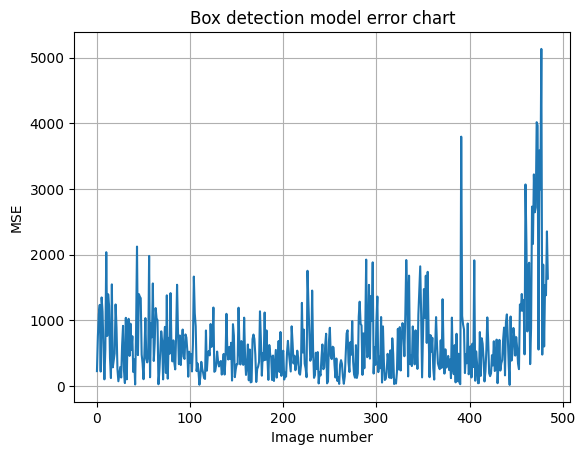

In [28]:
errors = np.mean((y_labels-y_pred_box)**2,axis=1)
plt.plot(errors)
plt.title("Box detection model error chart")
plt.xlabel("Image number")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 395ms/step - accuracy: 0.4613 - loss: 59380.8125 - val_accuracy: 0.5567 - val_loss: 311677.5312
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step - accuracy: 0.5232 - loss: 1153949.3750 - val_accuracy: 0.5567 - val_loss: 4164759.7500
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.5077 - loss: 10909921.0000 - val_accuracy: 0.5567 - val_loss: 28802718.0000
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - accuracy: 0.5206 - loss: 60351692.0000 - val_accuracy: 0.5567 - val_loss: 134794944.0000
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - accuracy: 0.4794 - loss: 248209936.0000 - val_accuracy: 0.5567 - val_loss: 480581440.0000
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 610ms/step - accuracy: 0.4897 - loss: 768286784.0000 - val_accuracy: 0.5567 - val_loss: 1389502336.0000
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 681ms/step - accuracy: 0.4691 - loss: 2077890688.0000 - val_accuracy: 0.5567 - val_loss: 3417470208.0000
Epo

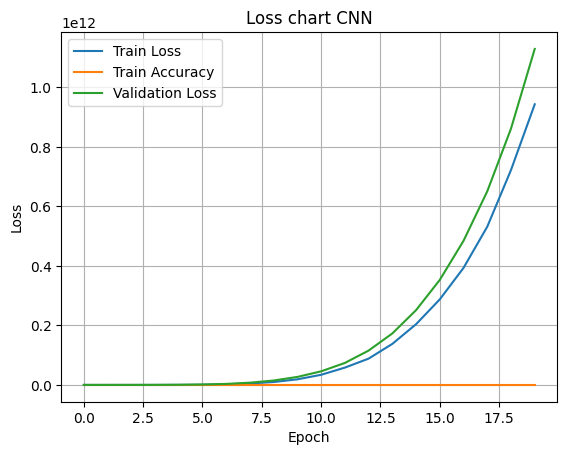

In [40]:
history = hybrid_model.fit([x_images, gene_features], y_labels, epochs=20, validation_split=0.2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss chart CNN")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.4613 - loss: 1289861464064.0000 - val_accuracy: 0.5567 - val_loss: 1462354182144.0000
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 395ms/step - accuracy: 0.5052 - loss: 1602177204224.0000 - val_accuracy: 0.5567 - val_loss: 1851947745280.0000
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step - accuracy: 0.4613 - loss: 2051332505600.0000 - val_accuracy: 0.5567 - val_loss: 2308383440896.0000
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.5052 - loss: 2378846961664.0000 - val_accuracy: 0.5567 - val_loss: 2824649572352.0000
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.4716 - loss: 3041329414144.0000 - val_accuracy: 0.5567 - val_loss: 3384652857344.0000
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 451ms/step - accuracy: 0.4871 - loss: 3688632418304.0000 - val_accuracy: 0.5567 - val_loss: 4145295392768.0000
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 398ms/step - accuracy: 0.5155 - loss: 435282195

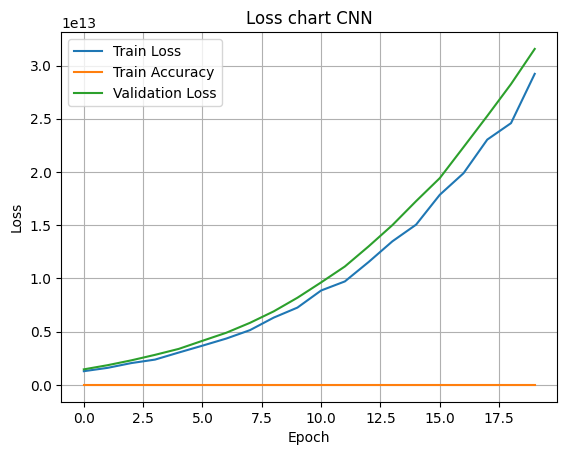

In [42]:
history_cnn_gen = hybrid_model.fit([x_images, gene_features], y_labels, epochs=20, validation_split=0.2)
plt.plot(history_cnn_gen.history["loss"], label="Train Loss")
plt.plot(history_cnn_gen.history["accuracy"], label="Train Accuracy")
plt.plot(history_cnn_gen.history["val_loss"], label="Validation Loss")
plt.title("Loss chart CNN")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()